In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as shc

###### https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
###### https://vitalflux.com/hierarchical-clustering-explained-with-python-example/

In [17]:
data = pd.read_csv("Wholesale customers data.csv")

In [18]:
df = pd.DataFrame(data)

In [19]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [21]:
df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


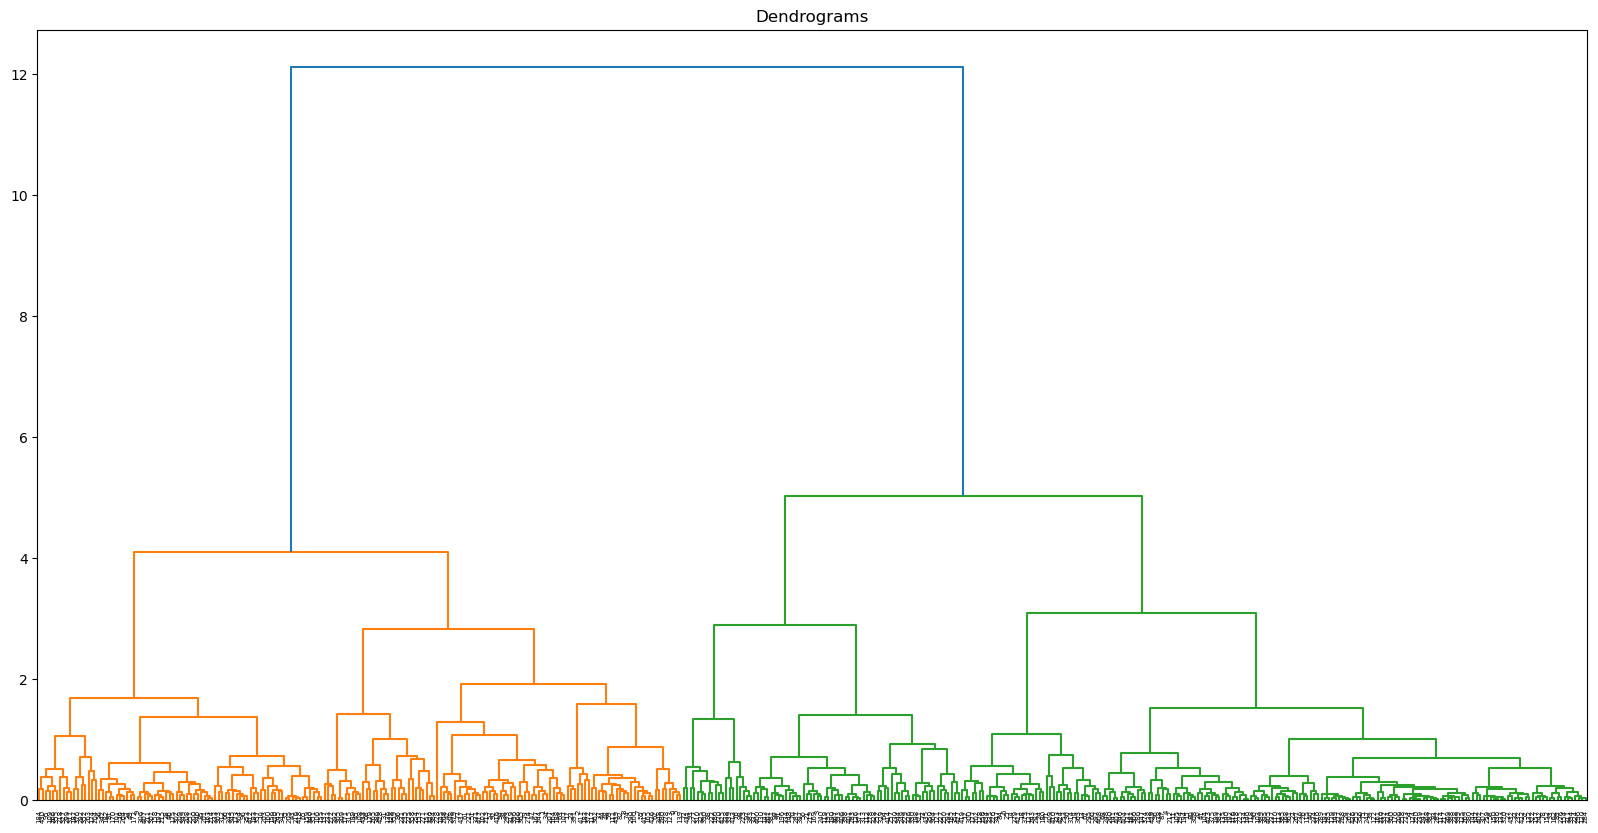

In [39]:
z = shc.linkage(df_scaled, method="ward")
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(z)

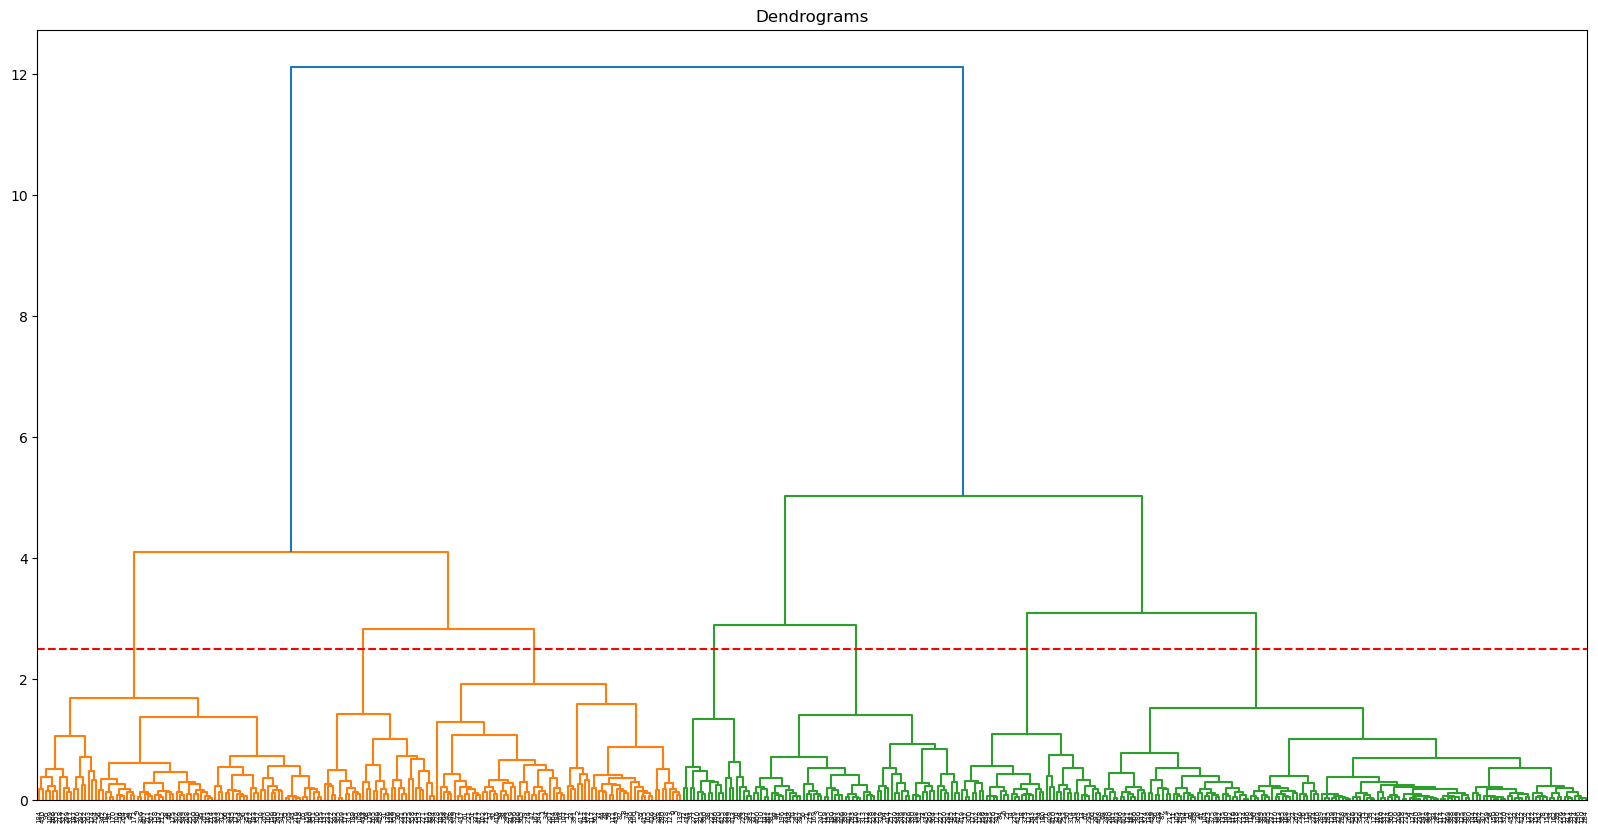

In [43]:
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(z,orientation = "top")
plt.axhline(y= 2.5, color="r", linestyle="--")

In [44]:
df_scaled.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

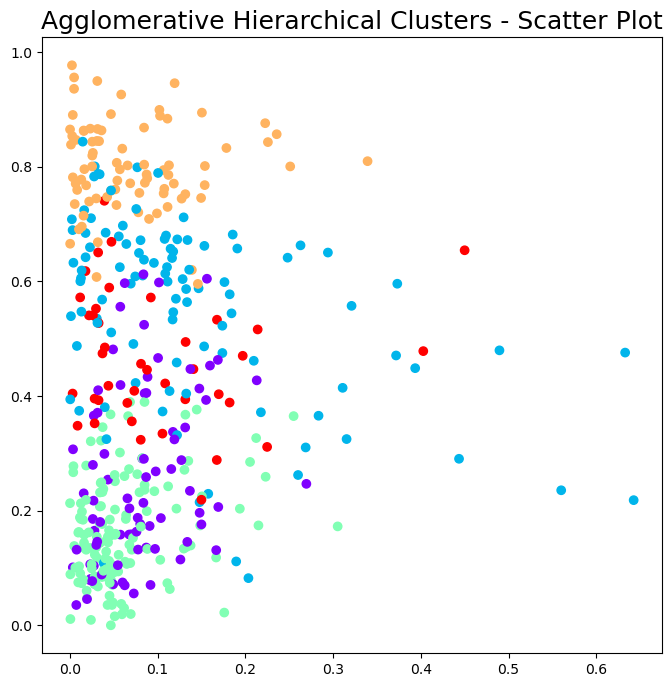

In [65]:
agc = AgglomerativeClustering(n_clusters=5)
plt.figure(figsize=(8, 8))
plt.scatter(
    df_scaled["Delicassen"],
    df_scaled["Grocery"],
    c=agc.fit_predict(df_scaled),
    cmap="rainbow",
)
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

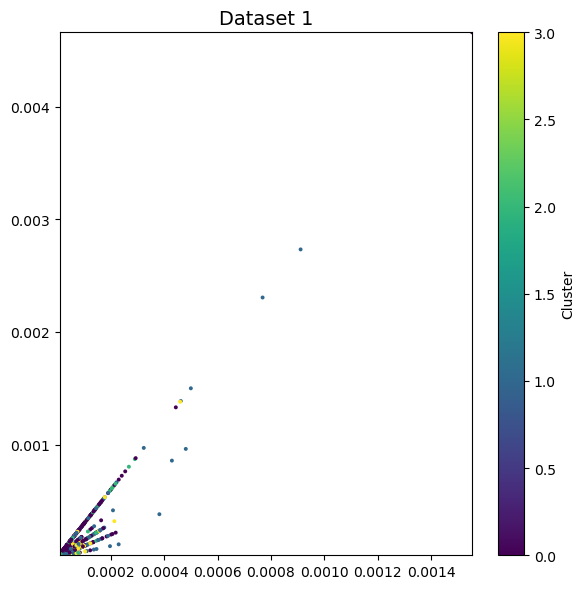

In [90]:
from sklearn import cluster

def cluster_plots(set1, colours1="gray", title1="Dataset 1"):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 6)  # Adjust the size if needed
    ax1.set_title(title1, fontsize=14)
    ax1.set_xlim(min(set1[:, 0]), max(set1[:, 0]))
    ax1.set_ylim(min(set1[:, 1]), max(set1[:, 1]))
    scatter = ax1.scatter(set1[:, 0], set1[:, 1], s=8, lw=0, c=colours1, cmap="viridis")
    fig.colorbar(scatter, ax=ax1, label="Cluster")
    fig.tight_layout()
    plt.show()


# Convert the DataFrame to a NumPy array
df_scaled_np = df_scaled[["Channel", "Region", "Fresh"]].to_numpy()

# Perform clustering
hc_dataset1 = cluster.AgglomerativeClustering(
    n_clusters=4, affinity="euclidean", linkage="ward"
).fit_predict(df_scaled_np)

# Plot clusters
cluster_plots(df_scaled_np, colours1=hc_dataset1)

### Applications of Hierarchical Clustering

- Biological Taxonomy: Hierarchical clustering is extensively used in biology to classify organisms into hierarchical taxonomies based on similarities in genetic or phenotypic characteristics. It helps understand evolutionary relationships and biodiversity.

- Document Clustering: In natural language processing, hierarchical clustering groups similar documents or texts. It aids in topic modeling, document organization, and information retrieval systems.

-  Image Segmentation: Hierarchical clustering segments images by grouping similar pixels or regions based on color, texture, or other visual features. 

- It finds applications in medical imaging, remote sensing, and computer vision.

- Customer Segmentation: Businesses use hierarchical clustering to group customers into groups based on their purchasing behaviors, demographics, or preferences. This helps with targeted marketing, personalized recommendations, and customer relationship management.

- Anomaly Detection: Hierarchical clustering can identify outliers or anomalies in datasets by isolating data points that do not fit well into any cluster. It is useful in fraud detection, network security, and quality control.

- Social Network Analysis: Hierarchical clustering helps uncover community structures or hierarchical relationships in social networks by clustering users based on their interactions, interests, or affiliations. It aids in understanding network dynamics and identifying influential users.

- Market Basket Analysis: Retailers use hierarchical clustering to analyze transaction data and identify associations between products frequently purchased together. It enables them to optimize product placements, promotions, and cross-selling strategies.